# Обработка датасета

In [58]:
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [59]:
random_state = 14

In [60]:
data : pd.DataFrame = pd.read_csv("diamonds.csv", delimiter=",") # price
# data.rename(columns={"Unnamed: 0": "id"}, inplace=True)
# data.set_index("id", inplace=True)
data.drop(columns=["Unnamed: 0"], inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [61]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [62]:
data.cut = data.cut.map({"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5})

In [63]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [64]:
data = pd.get_dummies(columns=["color", "clarity"], data=data)
data

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,5,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,4,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,2,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,4,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,2,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,60.8,57.0,2757,5.75,5.76,3.50,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,2,63.1,55.0,2757,5.69,5.75,3.61,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,3,62.8,60.0,2757,5.66,5.68,3.56,1,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,4,61.0,58.0,2757,6.15,6.12,3.74,0,0,...,0,0,0,0,0,1,0,0,0,0


# Построение моделей в sklearn

In [65]:
X : pd.DataFrame = data.drop(["price"], axis=1)
y : pd.Series = data.price

y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [66]:
def get_metrics(model , X_test, y_test, y_prediction) -> dict[str, np.float64]:
    results = {
        "MAE": metrics.mean_absolute_error(y_test, y_prediction),
        "MSE": metrics.mean_squared_error(y_test, y_prediction),
        "RMSE": metrics.mean_squared_error(y_test, y_prediction, squared=False),
        "MAPE": metrics.mean_absolute_percentage_error(y_test, y_prediction),
        "R2": model.score(X_test, y_test)
    }
    return results

## Линейная модель

### Без регуляризаций

In [67]:
testSize = 0.2
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=testSize, shuffle=True, random_state=random_state)

In [68]:
linearRegressionModel = sklearn.linear_model.LinearRegression().fit(X_train, y_train)
y_linearPrediction = linearRegressionModel.predict(X_test)

get_metrics(linearRegressionModel, X_test, y_test, y_linearPrediction)

{'MAE': 742.0081790412179,
 'MSE': 1340484.7933013705,
 'RMSE': 1157.7930701560492,
 'MAPE': 0.38248823443969265,
 'R2': 0.9162041424034382}

In [69]:
linearRegressionModel.coef_

array([11360.29520353,    98.48825397,   -80.6054256 ,   -29.29657647,
       -1069.70599646,    14.44268797,   -34.57868265,   823.86296868,
         622.4630716 ,   552.58816625,   339.42255248,  -152.48394997,
        -644.26241055, -1541.59039849, -3821.60204311,  1491.97970357,
        -139.20845718, -1109.71794826,   780.24959828,   467.26292345,
        1191.97681191,  1139.05941133])

### L1

In [70]:
parameters = {"alpha": np.arange(0.1, 1, 0.05), "tol": [1e-2]}

lassoModel = sklearn.model_selection.GridSearchCV(sklearn.linear_model.Lasso(max_iter=1500), parameters, n_jobs=-1).fit(X_train, y_train)
y_lassoPrediction = lassoModel.predict(X_test)

get_metrics(lassoModel, X_test, y_test, y_lassoPrediction)

{'MAE': 742.0174971111414,
 'MSE': 1340437.4138170697,
 'RMSE': 1157.7726088559316,
 'MAPE': 0.38124694302323114,
 'R2': 0.9162071041711056}

In [71]:
lassoModel.best_params_["alpha"]

0.40000000000000013

### L2

In [72]:
parameters = {"alpha": np.arange(0.05, 1, 0.05)} # lasso

ridgeModel = sklearn.model_selection.GridSearchCV(sklearn.linear_model.Ridge(), parameters).fit(X_train, y_train)
y_ridgePrediction = ridgeModel.predict(X_test)

get_metrics(ridgeModel, X_test, y_test, y_ridgePrediction)

{'MAE': 742.2208310071622,
 'MSE': 1340371.7024028779,
 'RMSE': 1157.7442301315425,
 'MAPE': 0.382538253028439,
 'R2': 0.9162112118971564}

In [73]:
ridgeModel.best_params_["alpha"]

0.8500000000000001

## Полиномиальная модель

### Без регуляризаций

In [74]:
polynom = preprocessing.PolynomialFeatures(2)
X_polynom = polynom.fit_transform(X)
testSize = 0.2
y_reshaped = y.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_polynom, y_reshaped, test_size=testSize, shuffle=True, random_state=random_state)

In [75]:
linearRegressionModel = sklearn.linear_model.LinearRegression().fit(X_train, y_train)
y_polynomPrediction = linearRegressionModel.predict(X_test)

get_metrics(linearRegressionModel, X_test, y_test, y_polynomPrediction)

{'MAE': 413.1385864721743,
 'MSE': 545002.2589614404,
 'RMSE': 738.2426829718263,
 'MAPE': 0.15607128329863235,
 'R2': 0.965931033376915}

### L1

In [76]:
linearRegressionModel = sklearn.linear_model.LinearRegression().fit(X_train, y_train)
y_polynomPrediction = linearRegressionModel.predict(X_test)

parameters = {"alpha": np.arange(0.05, 1, 0.05), "tol": [1e-1]}

lassoModel = sklearn.model_selection.GridSearchCV(sklearn.linear_model.Lasso(max_iter=50), parameters, n_jobs=-1).fit(X_train, y_train) # ~13 sec
y_lassoPrediction = lassoModel.predict(X_test)

get_metrics(lassoModel, X_test, y_test, y_lassoPrediction)

{'MAE': 691.6750210927825,
 'MSE': 998700.0759860888,
 'RMSE': 999.3498266303391,
 'MAPE': 0.3587141935770113,
 'R2': 0.9375696540779846}

In [77]:
lassoModel.best_params_

{'alpha': 0.05, 'tol': 0.1}

### L2

In [78]:
linearRegressionModel = sklearn.linear_model.LinearRegression().fit(X_train, y_train)
y_polynomPrediction = linearRegressionModel.predict(X_test)

parameters = {"alpha": np.arange(0.05, 1, 0.05)}

ridgeModel = sklearn.model_selection.GridSearchCV(sklearn.linear_model.Ridge(), parameters, n_jobs=3).fit(X_train, y_train)
y_ridgePrediction = ridgeModel.predict(X_test)

get_metrics(ridgeModel, X_test, y_test, y_ridgePrediction)

{'MAE': 412.39090581362404,
 'MSE': 528469.2363783447,
 'RMSE': 726.9588959345258,
 'MAPE': 0.15546936767004152,
 'R2': 0.9669645391749195}

In [79]:
ridgeModel.best_params_["alpha"]

0.9500000000000001

# Построение модели с нуля

In [80]:
testSize = 0.2
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=testSize, shuffle=True, random_state=random_state)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [100]:
class LinearRegressionModel:
    def __init__(self, alpha: float, learning_rate=0.00004, iterations=20000) -> None:
        self.X = None
        self.Y = None
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    def fit(self, X: np.ndarray, Y: np.ndarray) -> object:
        self.X = X
        self.Y = Y
        self.m, self.n = X.shape
        self.multipliers = np.full(shape=(self.n, 1), fill_value=0.)
        self.w0 = 0
        self._update()
        return self

    def _update(self) -> None:
        for i in range(1, self.iterations + 1):
            prediction = self.predict(self.X)

            weights_difference = (-(2 * (self.X.T).dot(self.Y - prediction)) + (2 * self.alpha * self.multipliers)) / self.m

            w0_difference = -2 * np.sum(self.Y - prediction) / self.m

            self.multipliers -= self.learning_rate * weights_difference
            self.w0 -= self.learning_rate * w0_difference
        return
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        return X.dot(self.multipliers)
    
    def get_metrics(self, X_test: np.ndarray, Y_actual: np.ndarray) -> dict[str, float]:
        prediction = self.predict(X_test)
        results = {
            "MAE": np.sum(np.abs(Y_actual - prediction)) / self.m,
            "MSE": np.sum((Y_actual - prediction)**2) / self.m,
            "MAPE": np.sum(np.abs((Y_actual - prediction) / Y_actual)) / self.m,
        }
        results.update({"RMSE": np.sqrt(results["MSE"])})
        results.update({"R2": 1 - self.m * results["MSE"] / np.sum((Y_actual - np.sum(Y_actual) / self.m)**2)})
        return results


In [101]:
test = LinearRegressionModel(0.1)
test.fit(X_train, y_train)
test.predict(X_test)
print(test.get_metrics(X_test, y_test))

{'MAE': 319.67261742590813, 'MSE': 787394.9864645996, 'MAPE': 0.15022026668201177, 'RMSE': 887.3527970681107, 'R2': 0.8731052523874694}


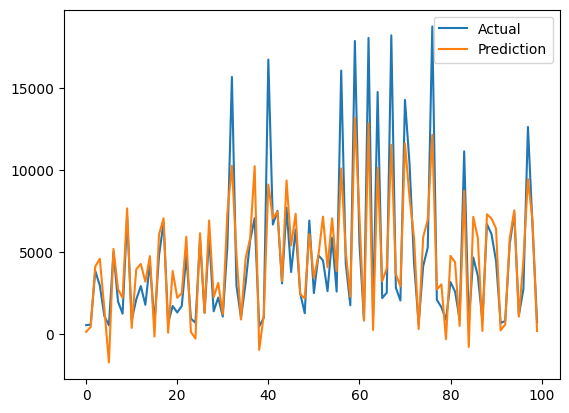

In [102]:
plt.plot(y_test[:100], label="Actual");
plt.plot(test.predict(X_test)[:100], label="Prediction");
plt.legend();